In [1]:
# here put the import lib
import random
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pdb
import os
import subprocess
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:

'''
remvoe tfs due to zero binding in valid datasets
K562 BRF2 and TFAM
HepG2 BCLAF1
'''

A549 =  ["ATOH8","BCL3","BHLHE40","CBX2","CEBPB","CTCF","E2F6","EHF","ELK1","EP300","ESRRA","FOSL2","FOXF2","FOXS1","GATA3","HES2","HEYL","HMGA2","HMGXB4","HOXA7","HOXB13","HOXB5","JUN","MAFK","MAX","MAZ","MYC","NFE2L2","NR2E3","NR3C1","NR5A2","PBX1","PBX3","PRDM1","RARB","RCOR1","REST","RFX5","RNF2","SREBF1","SREBF2","TEAD4","TP53","TP63","USF2","ZNF302","ZNF624","ZSCAN20"]

GM12878 = ["ARID3A", "ARNT", "ATF2", "ATF3", "BACH1", "BATF", "BCL11A", "BCL3", "BCLAF1", "BHLHE40", "BMI1", "CBFB", "CEBPB", "CEBPZ", "CREB1", "CREM", "CTCF", "CUX1", "E2F4", "E2F8", "E4F1", "EBF1", "EGR1", "ELF1", "ELK1", "EP300", "ESRRA", "ETS1", "ETV6", "FOS", "FOXK2", "GABPA", "GATAD2B", "HSF1", "IKZF1", "IKZF2", "IRF3", "IRF4", "IRF5", "JUND", "KLF5", "MAFK", "MAX", "MAZ", "MEF2A", "MEF2B", "MEF2C", "MLLT1", "MXI1", "MYC", "NFATC1", "NFATC3", "NFIC", "NFXL1", "NFYA", "NFYB", "NKRF", "NR2C1", "NR2C2", "NR2F1", "NRF1", "PAX5", "PAX8", "PBX3", "PKNOX1", "POU2F2", "PRDM15", "RCOR1", "RELA", "RELB", "REST", "RFX5", "RUNX3", "RXRA", "SIX5", "SKIL", "SMAD1", "SMAD5", "SREBF1", "SREBF2", "SRF", "STAT1", "STAT3", "STAT5A", "TBP", "TBX21", "TCF12", "TCF3", "TCF7", "TRIM22", "UBTF", "USF1", "USF2", "YBX1", "YY1", "ZBED1", "ZBTB11", "ZBTB33", "ZBTB4", "ZBTB40", "ZEB1", "ZNF143", "ZNF217", "ZNF24", "ZNF384", "ZNF592", "ZNF687", "ZSCAN29", "ZZZ3"]

H1 = ["ATF2","ATF3","BACH1","CEBPB","CHD7","CREB1","CTCF","E2F6","EGR1","EP300","FOSL1","GABPA","JUN","JUND","MAFK","MAX","MXI1","MYC","NANOG","NRF1","POU5F1","REST","RFX5","RNF2","RXRA","SIX5","SP1","SP2","SP4","SRF","TBP","TCF12","TEAD4","USF1","USF2","YY1","ZNF143","ZNF274"]

HEK293 = ["AEBP2","ATF2","BCL11A","BCL11B","BCL6B","CBLL2","CTCF","EGR2","ELK4","FEZF1","GFI1B","GLI2","GLI4","GLIS1","GLIS2","HIC1","HOXA7","HOXB7","HOXC10","HOXD13","IKZF3","INSM2","KLF1","KLF10","KLF16","KLF17","KLF7","KLF8","KLF9","MAZ","MEIS1","MYNN","MZF1","OSR2","OVOL3","PATZ1","PBX3","PRDM1","PRDM10","PRDM2","PRDM4","PRDM6","RBAK","REST","SALL2","SCRT1","SCRT2","SP2","SP3","SP7","TCF7L2","TRIM28","TSHZ1","WT1","YY1","YY2","ZBTB10","ZBTB11","ZBTB12","ZBTB17","ZBTB20","ZBTB21","ZBTB26","ZBTB44","ZBTB48","ZBTB49","ZBTB6","ZBTB8A","ZEB1","ZEB2","ZFHX2","ZFP3","ZFP37","ZFP41","ZFP69B","ZIC2","ZNF10","ZNF112","ZNF114","ZNF121","ZNF132","ZNF133","ZNF138","ZNF140","ZNF146","ZNF148","ZNF155","ZNF157","ZNF16","ZNF169","ZNF174","ZNF175","ZNF18","ZNF184","ZNF189","ZNF19","ZNF2","ZNF202","ZNF211","ZNF214","ZNF221","ZNF223","ZNF23","ZNF239","ZNF24","ZNF248","ZNF26","ZNF263","ZNF266","ZNF274","ZNF280C","ZNF280D","ZNF292","ZNF302","ZNF311","ZNF324","ZNF34","ZNF341","ZNF350","ZNF354C","ZNF362","ZNF37A","ZNF391","ZNF394","ZNF398","ZNF404","ZNF416","ZNF423","ZNF426","ZNF433","ZNF449","ZNF473","ZNF48","ZNF488","ZNF501","ZNF510","ZNF513","ZNF514","ZNF518A","ZNF521","ZNF529","ZNF530","ZNF544","ZNF547","ZNF548","ZNF549","ZNF555","ZNF558","ZNF560","ZNF561","ZNF571","ZNF580","ZNF585B","ZNF596","ZNF600","ZNF610","ZNF621","ZNF623","ZNF624","ZNF626","ZNF629","ZNF639","ZNF654","ZNF658","ZNF660","ZNF664","ZNF670","ZNF677","ZNF680","ZNF692","ZNF701","ZNF704","ZNF707","ZNF747","ZNF76","ZNF770","ZNF776","ZNF777","ZNF785","ZNF791","ZNF792","ZNF837","ZNF843","ZSCAN16","ZSCAN18","ZSCAN21","ZSCAN23","ZSCAN26","ZSCAN30","ZSCAN4","ZSCAN5A","ZSCAN5C","ZXDB"]

HeLaS3 = ["BRF2","CEBPB","CTCF","E2F1","E2F4","E2F6","ELK1","ELK4","EP300","FOS","GABPA","GTF3C2","IRF3","JUN","JUND","MAFF","MAFK","MAX","MAZ","MXI1","MYC","NFE2L2","NFYA","NFYB","NR2C2","NRF1","PRDM1","RCOR1","REST","RFX5","SREBF2","STAT3","TBP","TCF7L2","UBTF","USF2","ZHX1","ZKSCAN1","ZNF143","ZNF274","ZZZ3"]

HepG2 = ["MTERF2","ADNP","AFF4","AHDC1","AHR","AKNA","ARHGAP35","ARID3A","ARID4A","ARID4B","ARID5B","ARNT","ARNT2","ARNTL","ATAD3A","ATF1","ATF2","ATF3","ATF4","ATF5","ATF6","BATF2","BAZ2A","BCL3","BCL6","BHLHA15","BHLHE40","BRF2","CBFB","CBX2","CC2D1A","CEBPA","CEBPB","CEBPD","CEBPG","CEBPZ","CENPBD1","CERS6","CHCHD3","CREB1","CREB3","CREBL2","CREM","CSRNP1","CSRNP2","CTCF","DBP","DDIT3","DLX6","DMTF1","DRAP1","DZIP1","E2F1","E2F2","E2F4","E2F5","E2F8","EEA1","EGR1","ELF1","ELF4","ELK1","ELK4","EP300","ESRRA","ETS1","ETV4","ETV5","ETV6","FBXL19","FOSL1","FOSL2","FOXA1","FOXA2","FOXA3","FOXC1","FOXJ3","FOXK1","FOXK2","FOXO1","FOXO4","FOXP4","FOXQ1","FUBP1","FUBP3","GABPA","GABPB1","GATA2","GATA4","GATAD2B","GFI1","GLI4","GLMP","GLYR1","GMEB1","GMEB2","GPBP1L1","GPN1","GRHL1","GZF1","HBP1","HHEX","HIC2","HINFP","HIVEP1","HLF","HMG20A","HMG20B","HMGXB3","HMGXB4","HNF1A","HNF1B","HNF4A","HNF4G","HNRNPK","HOMEZ","HOXA10","HOXA3","HOXA5","HOXA7","HOXA9","HOXD1","HSF2","IKZF1","IKZF4","IKZF5","IRF1","IRF2","IRF3","IRF5","IRF9","IRX3","ISL2","ISX","JUN","JUND","KDM6A","KLF11","KLF12","KLF13","KLF15","KLF16","KLF6","KLF9","LBX2","LCOR","LCORL","LIN54","LRRFIP1","MAF1","MAFF","MAFG","MAFK","MAX","MAZ","MBD1","MEF2A","MEF2D","MEIS1","MEIS2","MGA","MIXL1","MLLT10","MLX","MLXIP","MNT","MNX1","MTERF4","MTF1","MXD1","MXD3","MXI1","MYBL2","MYC","MYNN","MYPOP","MYRF","MZF1","NACC2","NFAT5","NFATC3","NFE2","NFE2L2","NFIA","NFIB","NFIC","NFIL3","NFKB2","NFYA","NFYB","NFYC","NKX3-1","NR0B2","NR1H2","NR2C2","NR2F1","NR2F2","NR2F6","NR3C1","NR5A1","NRF1","NRL","ONECUT1","ONECUT2","PATZ1","PAX8","PAXIP1","PBX2","PBX3","PHB2","PITX1","PLSCR1","POGK","POU2F1","PPARG","PRDM10","PRDM15","PRDM4","PREB","PROX1","RARG","RBAK","RBPJ","RBSN","RCOR1","RCOR2","REL","RELA","RERE","REST","RFX1","RFX3","RFX5","RNF2","RNF219","RORA","RREB1","RXRA","RXRB","SALL1","SALL2","SATB2","SFPQ","SIX1","SIX4","SKIL","SMAD1","SMAD3","SMAD4","SMAD7","SMAD9","SNAI1","SNAPC4","SNAPC5","SOX13","SOX18","SOX5","SOX6","SP1","SP110","SP140L","SP2","SP4","SP5","SRF","SRY","STAT5B","STAT6","TBP","TBX2","TBX3","TCF12","TCF3","TCF7","TCF7L2","TEAD1","TEAD2","TEAD4","TEF","TERF1","TFAP4","TFDP1","TFDP2","TFE3","TGIF2","THAP11","THAP4","THAP7","THAP8","THAP9","THRA","THRB","TIGD3","TIGD6","TOPORS","TP53","TRAFD1","TRIM22","TRIM24","TSC22D1","TSC22D2","UBTF","USF1","USF2","USF3","XBP1","XRCC5","YBX1","YY1","ZBED4","ZBED5","ZBTB10","ZBTB14","ZBTB2","ZBTB20","ZBTB21","ZBTB24","ZBTB25","ZBTB26","ZBTB3","ZBTB33","ZBTB34","ZBTB37","ZBTB39","ZBTB4","ZBTB40","ZBTB42","ZBTB43","ZBTB44","ZBTB46","ZBTB49","ZBTB7B","ZBTB8A","ZC3H8","ZEB1","ZFAT","ZFHX3","ZFP1","ZFP14","ZFP37","ZFP41","ZFP62","ZFP64","ZFP82","ZFP90","ZFP91","ZFY","ZGPAT","ZHX1","ZHX2","ZHX3","ZIK1","ZKSCAN1","ZKSCAN5","ZKSCAN8","ZMAT5","ZMYM2","ZMYM3","ZMYM4","ZNF10","ZNF101","ZNF12","ZNF121","ZNF124","ZNF138","ZNF142","ZNF143","ZNF146","ZNF160","ZNF17","ZNF18","ZNF180","ZNF181","ZNF20","ZNF205","ZNF217","ZNF219","ZNF221","ZNF224","ZNF225","ZNF230","ZNF232","ZNF234","ZNF235","ZNF24","ZNF25","ZNF251","ZNF253","ZNF256","ZNF260","ZNF263","ZNF264","ZNF274","ZNF275","ZNF276","ZNF280B","ZNF280D","ZNF281","ZNF282","ZNF292","ZNF296","ZNF3","ZNF30","ZNF317","ZNF318","ZNF329","ZNF331","ZNF333","ZNF337","ZNF33A","ZNF33B","ZNF34","ZNF343","ZNF350","ZNF354B","ZNF362","ZNF367","ZNF382","ZNF383","ZNF384","ZNF407","ZNF414","ZNF430","ZNF431","ZNF432","ZNF44","ZNF441","ZNF446","ZNF460","ZNF468","ZNF48","ZNF483","ZNF484","ZNF485","ZNF490","ZNF496","ZNF501","ZNF503","ZNF510","ZNF511","ZNF512","ZNF512B","ZNF513","ZNF526","ZNF527","ZNF530","ZNF543","ZNF546","ZNF547","ZNF548","ZNF549","ZNF550","ZNF552","ZNF556","ZNF557","ZNF558","ZNF562","ZNF563","ZNF564","ZNF567","ZNF569","ZNF570","ZNF571","ZNF572","ZNF574","ZNF576","ZNF577","ZNF580","ZNF589","ZNF597","ZNF605","ZNF607","ZNF608","ZNF609","ZNF614","ZNF615","ZNF616","ZNF619","ZNF629","ZNF639","ZNF644","ZNF646","ZNF652","ZNF660","ZNF670","ZNF672","ZNF674","ZNF678","ZNF687","ZNF691","ZNF697","ZNF7","ZNF704","ZNF707","ZNF709","ZNF710","ZNF713","ZNF720","ZNF724","ZNF737","ZNF740","ZNF746","ZNF747","ZNF749","ZNF75D","ZNF761","ZNF766","ZNF770","ZNF772","ZNF773","ZNF775","ZNF776","ZNF777","ZNF778","ZNF780A","ZNF781","ZNF782","ZNF784","ZNF786","ZNF788P","ZNF790","ZNF792","ZNF800","ZNF816","ZNF827","ZNF83","ZNF839","ZNF841","ZNF850","ZNF865","ZNF878","ZNF879","ZNF883","ZNF891","ZSCAN12","ZSCAN20","ZSCAN21","ZSCAN22","ZSCAN25","ZSCAN29","ZSCAN30","ZSCAN31","ZSCAN5A","ZSCAN9","ZUP1","ZXDC","ZZZ3"]

K562 = ["ADNP","AFF1","AFF4","ARHGAP35","ARID1B","ARID3A","ARID3B","ARID4B","ARNT","ATF1","ATF2","ATF3","ATF4","ATF6","BACH1","BCL6","BCLAF1","BHLHE40","BMI1","CBFB","CBX1","CC2D1A","CDC5L","CEBPB","CEBPG","CEBPZ","CGGBP1","CHAMP1","CHCHD3","CLOCK","CREB1","CREB3","CREB3L1","CREB5","CREM","CTCF","CTCFL","CUX1","DACH1","DDIT3","DEAF1","DLX4","DMBX1","DMTF1","E2F1","E2F3","E2F4","E2F5","E2F6","E2F7","E2F8","E4F1","EGR1","ELF1","ELF2","ELF4","ELK1","ELK3","EP300","ESRRA","ESRRB","ETS1","ETS2","ETV1","ETV5","ETV6","FOS","FOSL1","FOXA1","FOXA3","FOXJ2","FOXJ3","FOXK1","FOXK2","FOXO4","FOXP4","GABPA","GABPB1","GABPB2","GATA1","GATA2","GATAD2B","GMEB1","GTF2B","GTF2I","GTF3C2","HBP1","HES1","HEY1","HINFP","HIVEP1","HMBOX1","HMG20A","HMG20B","HMGXB4","HNRNPK","HOMEZ","ID3","IFI16","IKZF1","ILK","IRF1","IRF2","IRF9","JUN","JUND","KLF1","KLF10","KLF13","KLF16","KLF6","LCOR","LEF1","MAFF","MAFG","MAFK","MAX","MAZ","MBD1","MECOM","MEF2A","MEF2D","MEIS2","MGA","MITF","MLLT1","MLX","MNT","MTF1","MXD1","MXI1","MYBL2","MYC","MYNN","NEUROD1","NFATC3","NFE2","NFIC","NFIX","NFXL1","NFYA","NFYB","NKRF","NR0B1","NR1H2","NR2C1","NR2C2","NR2F1","NR2F2","NR2F6","NR3C1","NR4A1","NRF1","OTX1","PATZ1","PBX2","PHB2","PHTF2","PKNOX1","POU5F1","PPARD","PRDM10","PREB","PTTG1","RBPJ","RCOR1","RELA","RERE","REST","RFX1","RFX5","RFX7","RHOXF2B","RLF","RNF2","RNF219","RREB1","RUNX1","SFPQ","SIX5","SKIL","SMAD1","SMAD2","SMAD3","SMAD4","SMAD5","SNAPC5","SOX6","SP1","SP2","SREBF1","SREBF2","SRF","STAT5A","STAT5B","STAT6","TBPL1","TBX18","TCF12","TCF15","TCF3","TCF7","TCF7L2","TCFL5","TEAD1","TEAD2","TEAD4","TFAP4","TFCP2","TFDP1","TFE3","TGIF2","THAP1","THAP12","THAP7","THRA","THRB","TRIM24","TRIM25","TRIM28","TSC22D4","TSHZ1","UBTF","USF1","USF2","VEZF1","XRCC5","YBX1","YY1","ZBED1","ZBTB11","ZBTB12","ZBTB17","ZBTB2","ZBTB26","ZBTB33","ZBTB34","ZBTB40","ZBTB43","ZBTB49","ZBTB5","ZBTB8A","ZBTB9","ZC3H8","ZEB2","ZFP1","ZFP30","ZFP91","ZHX1","ZKSCAN1","ZKSCAN3","ZKSCAN8","ZMIZ1","ZMYM3","ZNF12","ZNF121","ZNF124","ZNF133","ZNF134","ZNF140","ZNF143","ZNF148","ZNF165","ZNF174","ZNF175","ZNF184","ZNF197","ZNF212","ZNF215","ZNF217","ZNF224","ZNF23","ZNF232","ZNF239","ZNF24","ZNF253","ZNF257","ZNF263","ZNF274","ZNF277","ZNF280A","ZNF280B","ZNF281","ZNF282","ZNF3","ZNF311","ZNF316","ZNF317","ZNF318","ZNF319","ZNF324","ZNF347","ZNF354B","ZNF354C","ZNF384","ZNF395","ZNF397","ZNF398","ZNF407","ZNF408","ZNF41","ZNF431","ZNF436","ZNF444","ZNF445","ZNF449","ZNF507","ZNF511","ZNF512","ZNF518B","ZNF551","ZNF561","ZNF57","ZNF583","ZNF584","ZNF586","ZNF589","ZNF592","ZNF609","ZNF639","ZNF644","ZNF655","ZNF668","ZNF695","ZNF696","ZNF699","ZNF7","ZNF700","ZNF707","ZNF717","ZNF740","ZNF75A","ZNF76","ZNF764","ZNF766","ZNF77","ZNF778","ZNF780A","ZNF785","ZNF79","ZNF83","ZNF84","ZSCAN29","ZSCAN32","ZZZ3"]
  
MCF7 = ["ARID3A","BMI1","CEBPB","CEBPG","CLOCK","CREB1","CTCF","CUX1","E2F1","E2F4","E2F8","E4F1","EGR1","ELF1","ELK1","EP300","ESR1","ESRRA","FOS","FOSL2","FOXA1","FOXK2","GABPA","GATA3","GATAD2B","HES1","HSF1","JUN","JUND","KLF4","KLF9","MAFK","MAX","MAZ","MLLT1","MNT","MSX2","MYC","NEUROD1","NFIB","NFXL1","NR2F2","NRF1","OTX1","OVOL1","PAX8","PKNOX1","RCOR1","REST","RFX1","RFX5","SIX4","SP1","SPDEF","SREBF1","SRF","TCF12","TCF7L2","TEAD4","TRIM22","TSC22D1","TSC22D2","YBX1","ZBTB11","ZBTB33","ZBTB40","ZBTB7B","ZHX2","ZKSCAN1","ZNF217","ZNF227","ZNF24","ZNF331","ZNF444","ZNF507","ZNF512B","ZNF574","ZNF592","ZNF687","ZNF8"]
  
SKNSH = ["ARNTL","BACH2","BNC2","CREB5","CSRNP3","CTCF","ELF1","EP300","ESRRG","FOSL2","FOXJ3","GABPA","GATA2","GATA3","GLIS3","IRF3","ISL1","JUND","MAX","MEF2A","MXI1","NFIC","NRF1","OSR1","PATZ1","PBX3","POU6F1","PPARA","RARB","RCOR1","REST","RFX5","RXRA","SNAI2","TCF12","TCF4","TEAD4","TFAP2B","TOX","TOX2","TSHZ2","USF1","USF2","YY1","ZBTB33","ZFP3","ZFP30","ZNF565","ZNF608","ZNF70","ZNF8"]
  
WTC11 = ["AFF4","AR","ARID4B","ATF1","ATF2","ATF3","ATF6","CBFB","CDX4","CREB1","CREM","CTCF","E2F1","E2F4","E2F5","ELF4","EMX1","ERG","ESRRA","ETV6","FOXJ3","FOXK1","FOXP4","GABPB1","GRHL2","GTF2I","HMGA2","HMGXB4","IRF1","IRF2","JUN","MAX","MLX","MYBL2","NFATC4","NFYB","NR1H2","NR2C2","NR3C1","OTX2","OVOL2","PRDM15","PREB","PRRX2","RELA","RORB","SIX4","SMAD3","SMAD4","SOX15","SP1","STAT6","TCF7","TEAD1","TEAD4","TGIF2","TP53","TRERF1","USF1","USF2","ZBTB21","ZBTB33","ZBTB43","ZKSCAN8","ZMAT4","ZNF121","ZNF138","ZNF143","ZNF184","ZNF219","ZNF232","ZNF263","ZNF281","ZNF317","ZNF396","ZNF416","ZNF423","ZNF425","ZNF512","ZNF532","ZNF671","ZSCAN18"]

In [3]:
celltypes = {
    "A549": A549, 
    "GM12878": GM12878, 
    "H1": H1, 
    "HeLa-S3": HeLaS3, 
    "HepG2": HepG2,
    "K562": K562, 
    "MCF-7": MCF7, 
    "SK-N-SH": SKNSH,
    "WTC11": WTC11
            }

select_celltypes ={
    "A549": A549, 
    "GM12878": GM12878, 
    "H1": H1, 
    "HeLa-S3": HeLaS3, 
    "HepG2": HepG2,
    "K562": K562, 
    "MCF-7": MCF7, 
    "SK-N-SH": SKNSH,
    "WTC11": WTC11
}

In [4]:
metrics_dict = {}
metrics_dir = Path('../results/cross_celltype_valid/cross')
for model, tfs_model in select_celltypes.items():
    tfs_len = len(tfs_model)
    self_metrics_df = pd.read_table(f"{metrics_dir}/TFNet3_{model}.{model}_data_test.txt.eval.repl.tsv",header=0, index_col=0)
    metrics_dict[f"from.{model}.to.{model}"] = [self_metrics_df['AUC'].mean(), self_metrics_df['AUPR'].mean(), len(tfs_model)]
    print(f"Self: AUC {self_metrics_df['AUC'].mean():0.3f}, AUPR {self_metrics_df['AUPR'].mean():0.3f}")

    tmp = celltypes.copy()
    del tmp[model]
    for target, tfs_target in tmp.items():
        common_tfs = list(filter(lambda x: x in tfs_model, tfs_target))
        model_indexs = [ tfs_model.index(i) for i in common_tfs ]
        taraget_indexs = [ tfs_target.index(i) for i in common_tfs ]
        metrics_df = pd.read_table(f"{metrics_dir}/TFNet3_{model}.from.{target}.to.{model}.data_test.txt.eval.repl.tsv",header=0, index_col=0)
        select_metrics_df = metrics_df.iloc[model_indexs]
        metrics_dict[f"from.{target}.to.{model}"] = [select_metrics_df['AUC'].mean(), select_metrics_df['AUPR'].mean(), len(common_tfs)]
        #print(f"common_tfs: {common_tfs}")
        print(f"Model:{model}, Target:{target}")
        print(f"common_tfs number: {len(common_tfs)}")
        print(f"Target: AUC {select_metrics_df['AUC'].mean():0.3f}, AUPR {select_metrics_df['AUPR'].mean():0.3f}")
        print(f"\n")

Self: AUC 0.860, AUPR 0.144
Model:A549, Target:GM12878
common_tfs number: 18
Target: AUC 0.806, AUPR 0.173


Model:A549, Target:H1
common_tfs number: 13
Target: AUC 0.714, AUPR 0.135


Model:A549, Target:HeLa-S3
common_tfs number: 17
Target: AUC 0.820, AUPR 0.218


Model:A549, Target:HepG2
common_tfs number: 27
Target: AUC 0.748, AUPR 0.144


Model:A549, Target:K562
common_tfs number: 22
Target: AUC 0.805, AUPR 0.189


Model:A549, Target:MCF-7
common_tfs number: 17
Target: AUC 0.758, AUPR 0.169


Model:A549, Target:SK-N-SH
common_tfs number: 12
Target: AUC 0.685, AUPR 0.138


Model:A549, Target:WTC11
common_tfs number: 10
Target: AUC 0.782, AUPR 0.201


Self: AUC 0.948, AUPR 0.337
Model:GM12878, Target:A549
common_tfs number: 18
Target: AUC 0.901, AUPR 0.256


Model:GM12878, Target:H1
common_tfs number: 26
Target: AUC 0.861, AUPR 0.268


Model:GM12878, Target:HeLa-S3
common_tfs number: 28
Target: AUC 0.913, AUPR 0.314


Model:GM12878, Target:HepG2
common_tfs number: 73
Target: AUC 0.90

In [5]:
metrics_df = pd.DataFrame({
    "Names": metrics_dict.keys(),
    "AUC": [ i[0] for i in metrics_dict.values()],
    "AUPR": [ i[1] for i in metrics_dict.values()],
    "Common tf number": [ i[2] for i in metrics_dict.values()],
})
metrics_df['Model'] = metrics_df['Names'].apply(lambda x:x.split('.')[3])
metrics_df['Target'] = metrics_df['Names'].apply(lambda x:x.split('.')[1])

### Plot bar plot of AUC and AUPR of each celltype

In [6]:
metrics_df

,Names,AUC,AUPR,Common tf number,Model,Target
0,from.A549.to.A549,0.860080,0.143794,48,A549,A549
1,from.GM12878.to.A549,0.806204,0.173409,18,A549,GM12878
2,from.H1.to.A549,0.713793,0.134593,13,A549,H1
3,from.HeLa-S3.to.A549,0.820301,0.218158,17,A549,HeLa-S3
4,from.HepG2.to.A549,0.748094,0.143934,27,A549,HepG2
...,...,...,...,...,...,...
76,from.HeLa-S3.to.WTC11,0.775416,0.200823,9,WTC11,HeLa-S3
77,from.HepG2.to.WTC11,0.859685,0.175058,59,WTC11,HepG2
78,from.K562.to.WTC11,0.819666,0.117527,55,WTC11,K562
79,from.MCF-7.to.WTC11,0.711203,0.146442,11,WTC11,MCF-7


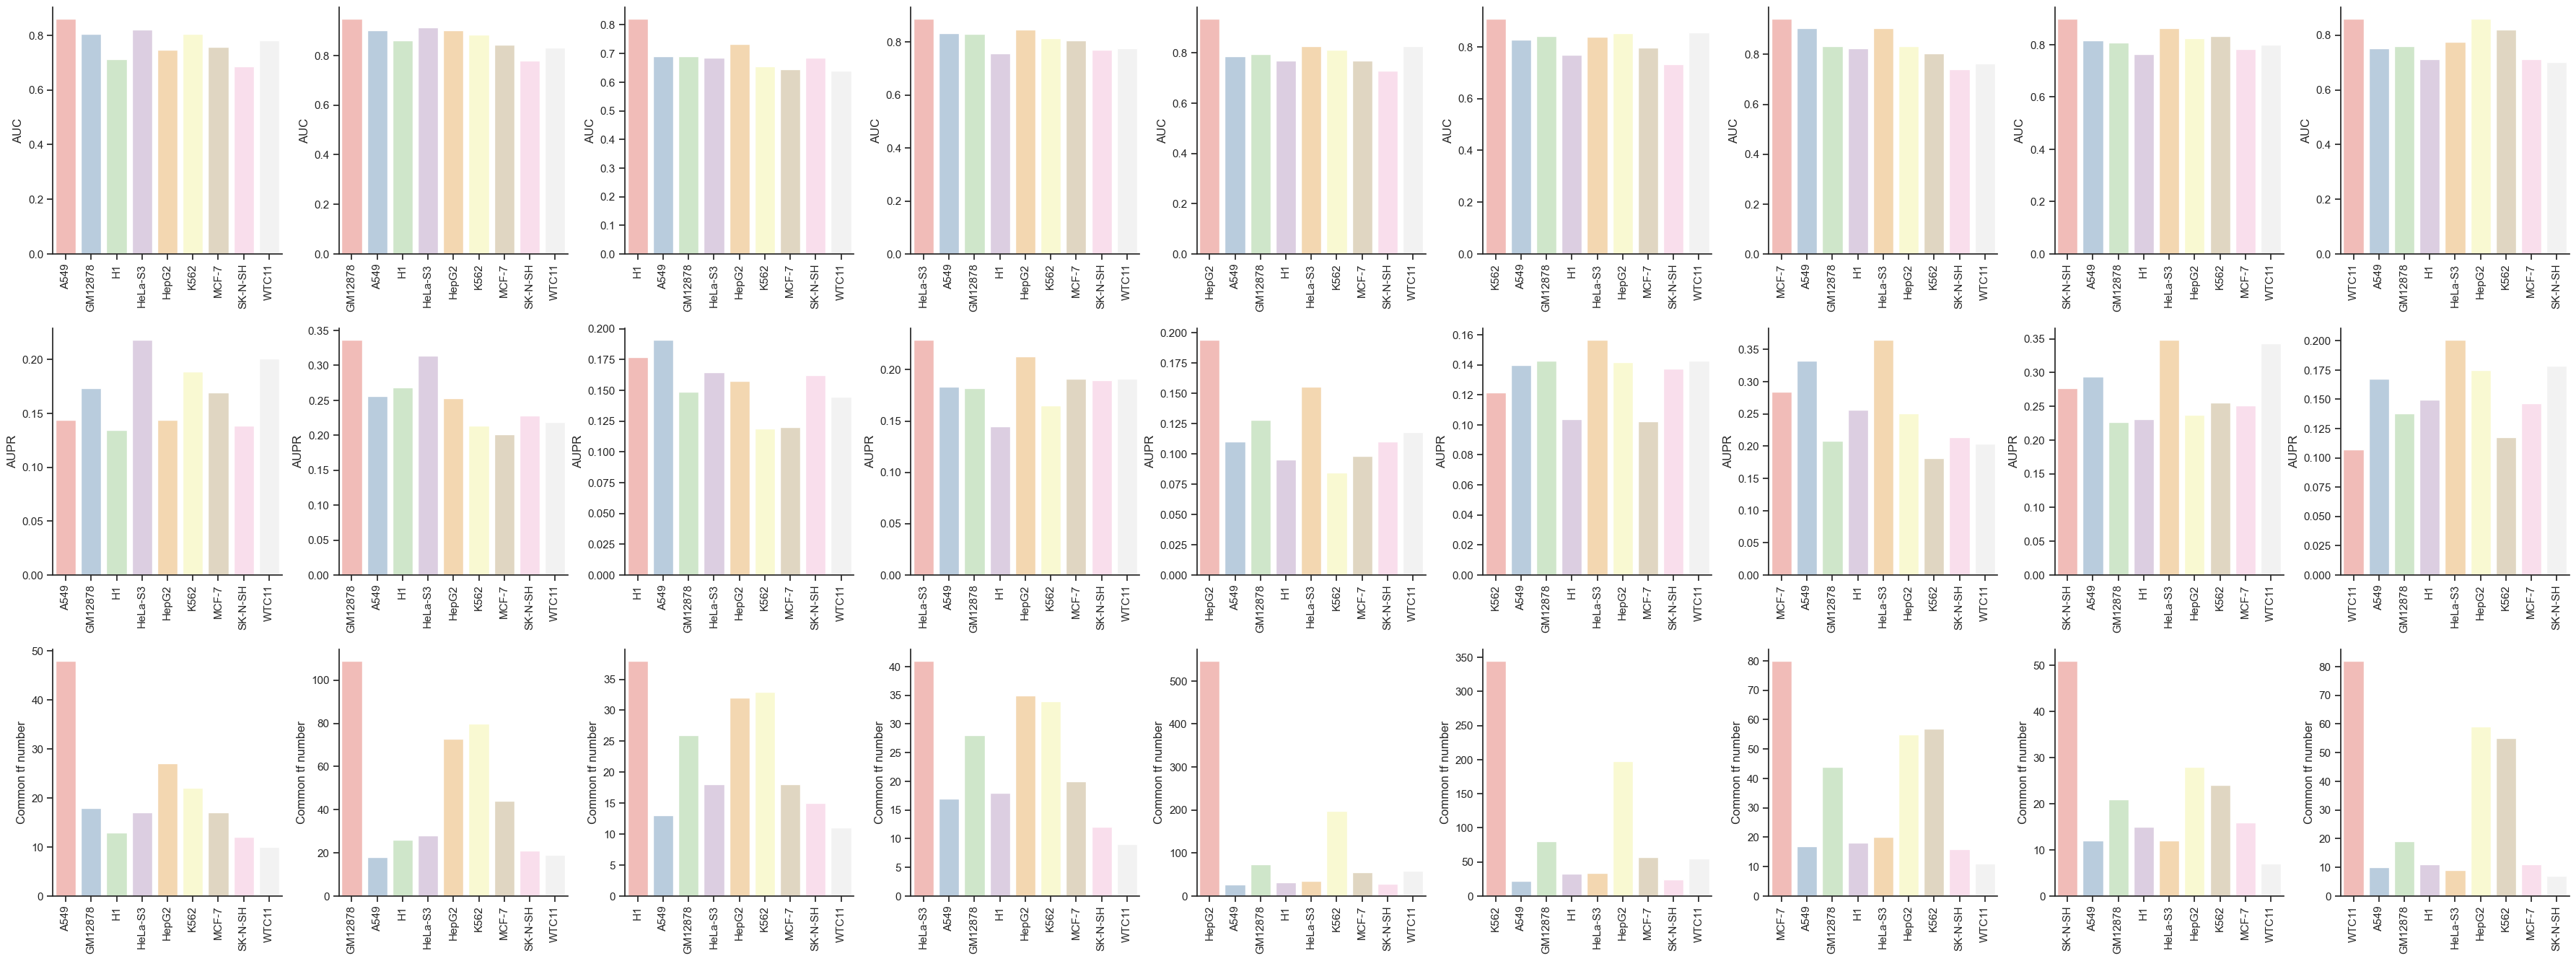

In [11]:
plt.rcParams.update({'font.size': 4})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#fig, ax = plt.subplots(figsize=(45, 16),ncols=3, nrows=len(select_celltypes))
fig, ax = plt.subplots(figsize=(45, 16),ncols=len(select_celltypes), nrows=3)
for index2, celltype in enumerate(["A549", "GM12878", "H1", "HeLa-S3", "HepG2", "K562", "MCF-7", "SK-N-SH", "WTC11"]):
    for index1,(a, target) in enumerate(zip(ax, ["AUC","AUPR", "Common tf number"])):
        sns.barplot(data=metrics_df[metrics_df['Model'] == celltype], x="Target", y=target, ax=ax[index1, index2], hue="Target", alpha=1, palette="Pastel1",dodge=False)
        ax[index1, index2].get_legend().set_visible(False)
        ax[index1, index2].set_xlim(-0.5, None)
        ax[index1, index2].set_xticklabels(ax[index1, index2].get_xticklabels(), rotation=90)
        ax[index1, index2].set_xlabel("")
plt.subplots_adjust(wspace=0.25, hspace=0.3)
#fig.savefig("results/cross_celltype_valid/cross/barplot.celltype.pdf", bbox_inches="tight")

### Plot heatmap of AUC and AUPR for all celltype together

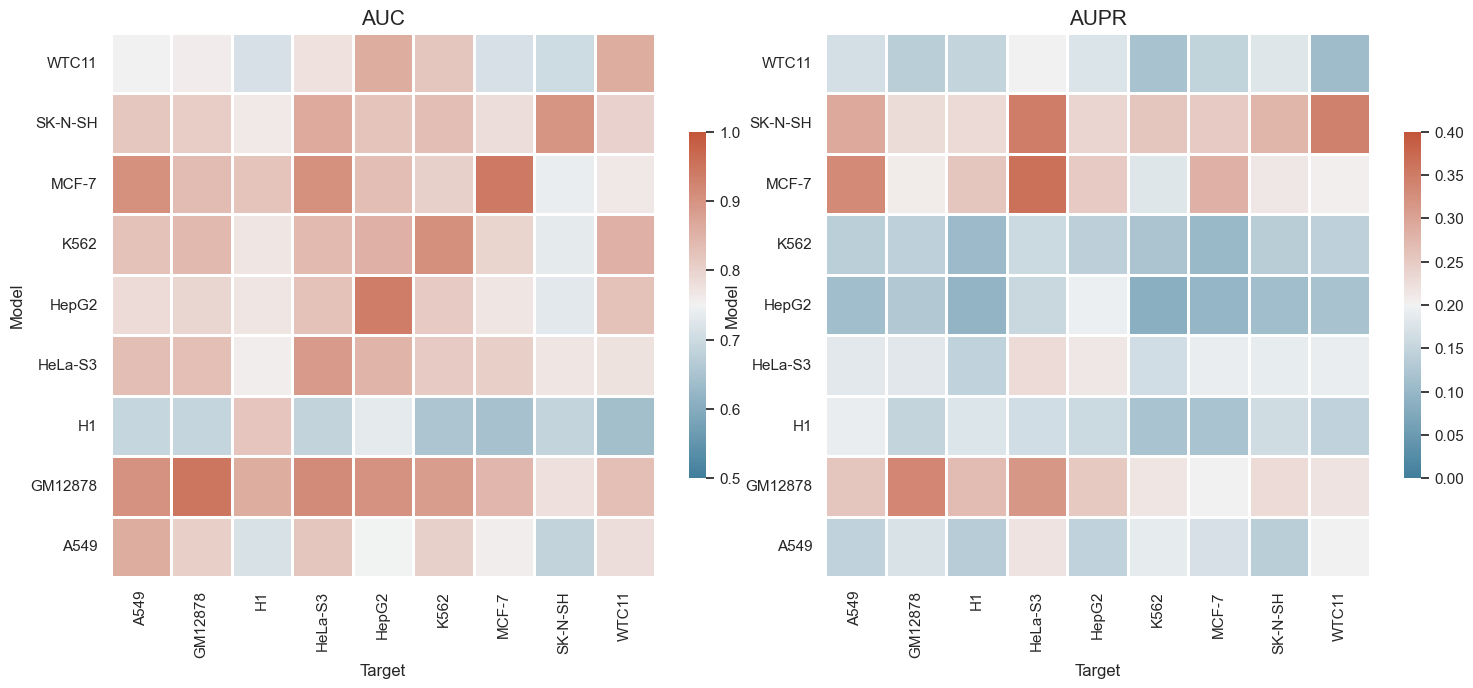

In [9]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(18, 9), ncols=2)
#fig, ax = plt.subplots(figsize=(9, 18), nrows=2)

sns.heatmap(metrics_df.pivot(index='Model', columns='Target', values="AUC").sort_index(ascending=False), 
            vmax=1, 
            vmin=0.5,
            square=True, linewidths=1, cbar_kws={"shrink": .5},
            cmap=cmap,
            ax=ax[0]
            )
ax[0].xaxis.set_ticks_position('none') 
ax[0].yaxis.set_ticks_position('none') 
ax[0].set_title("AUC", fontsize=15)

sns.heatmap(metrics_df.pivot(index='Model', columns='Target', values="AUPR").sort_index(ascending=False), 
            vmax=0.4, 
            vmin=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5},
            cmap=cmap,
            ax=ax[1]
            )
ax[1].xaxis.set_ticks_position('none') 
ax[1].yaxis.set_ticks_position('none') 
ax[1].set_title("AUPR", fontsize=15)
#ax[1].set_ylabel("")

plt.subplots_adjust(wspace=0.05, hspace=0)
#fig.savefig("results/cross_celltype_valid/cross/heatmap.celltype.2.pdf", bbox_inches="tight")